# Informed Search

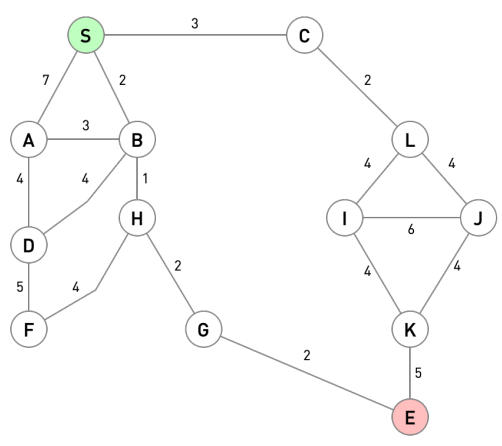

# Dijkstra Algorithm

Information about the real
cost/distance between pairs of
nodes

In [1]:
g = {
    's': {('a',7), ('b',2),('c',3)},
    'a': {('b',3), ('d',4),('s',7)},
    'b': {('a',3), ('d',4),('h',1),('s',2)},
    'c': {('l',2),('s',3)},
    'd': {('a',4), ('b',4),('f',5)},
    'e': {('k',5), ('g',2)},
    'f': {('d',5), ('h',4)},
    'g': {('h',2), ('e',2)},
    'h': {('b',1), ('f',4),('g',2)},
    'i': {('k',4), ('l',4),('j',6)},
    'j': {('k',4), ('l',4),('i',6)},
    'k': {('i',4), ('j',4),('e',5)},
    'l': {('c',2), ('i',4),('j',4)},
}

In [2]:
def dijkstra(graph, start, goal):
    q = [(start, [start], 0)]  # start = nó inicial ; [start] = path até ao nó atual ; 0 = custo até ao nó atual
    #lista de tuplos          
    done= set()  # processed nodes end up here
    i = 0 # vamos manter um contador da iteração na qual estamos
    while q:
        #print('current q has ', q)
        i += 1
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        if h[0]== goal: #pergunto se a cabeça é o nó objetivo
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return # se é, acabou o programa
        else:
            e_filter = [] #expansão dos nós do  no atual
            for node in graph[h[0]]:
                #verificamos se h[0] já está no path percorrido atual, e se já foi visitado 
                if node not in h[1] and node[0] not in done: 
                    e_filter.append(node) # se não é, marco o h como "visitado"
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1])for e_final in e_filter]
            #e_final[0] = novo nó de cabeça ; h[1] + [e_final[0]] é o path para a cabeça ; h[2] + e_final[1]  é o valor da total do custo até aquele nó 
            done.add(h[0]) #adicionamos o h à lista dos nós visitados
            q = sorted(e+r, key = lambda tup: (tup[2],tup[0])) # ordenar pelos tuplos tup[2] = custo
    

In [3]:
dijkstra(g, 's','e')

Total iterations:  10
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7


# A Star Algorithm

Information about the
estimates of how far we are to
the goal from every other node

In [4]:
heuristics = {
    's': 10,
    'a': 9,
    'b': 7,
    'c': 8,
    'd': 8,
    'e': 0,
    'f': 6,
    'g': 3,
    'h': 6,
    'i': 4,
    'j': 4,
    'k': 5,
    'l': 6 
}

In [5]:
def a_star(graph,start,goal,heuristics):
    q= [(start, [start], 0, heuristics[start], 0 + heuristics[start])]
    done = set()
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return 
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1] and node[0] not in done:
                    e_filter.append((node[0], node[1], heuristics[node[0]]))
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1],e_final[2], h[2] + e_final[1] + e_final[2])for e_final in e_filter]
            done.add(h[0])
            q = sorted(e+r, key = lambda tup: (tup[4],tup[3])) 

In [6]:
a_star(g, 's','e',heuristics)

Total iterations:  5
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7


#  A Star With Node Class

In [7]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position



In [8]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


In [9]:

def main():

    maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (7, 6)

    path = astar(maze, start, end)
    print(path)


if __name__ == '__main__':
    main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]
